In [ ]:
# !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

In [1]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os

for fname in os.listdir('cats_and_dogs_filtered/train/dogs'):
  print(fname)

dog.0.jpg
dog.1.jpg
dog.10.jpg
dog.100.jpg
dog.101.jpg
dog.102.jpg
dog.103.jpg
dog.104.jpg
dog.105.jpg
dog.106.jpg
dog.107.jpg
dog.108.jpg
dog.109.jpg
dog.11.jpg
dog.110.jpg
dog.111.jpg
dog.112.jpg
dog.113.jpg
dog.114.jpg
dog.115.jpg
dog.116.jpg
dog.117.jpg
dog.118.jpg
dog.119.jpg
dog.12.jpg
dog.120.jpg
dog.121.jpg
dog.122.jpg
dog.123.jpg
dog.124.jpg
dog.125.jpg
dog.126.jpg
dog.127.jpg
dog.128.jpg
dog.129.jpg
dog.13.jpg
dog.130.jpg
dog.131.jpg
dog.132.jpg
dog.133.jpg
dog.134.jpg
dog.135.jpg
dog.136.jpg
dog.137.jpg
dog.138.jpg
dog.139.jpg
dog.14.jpg
dog.140.jpg
dog.141.jpg
dog.142.jpg
dog.143.jpg
dog.144.jpg
dog.145.jpg
dog.146.jpg
dog.147.jpg
dog.148.jpg
dog.149.jpg
dog.15.jpg
dog.150.jpg
dog.151.jpg
dog.152.jpg
dog.153.jpg
dog.154.jpg
dog.155.jpg
dog.156.jpg
dog.157.jpg
dog.158.jpg
dog.159.jpg
dog.16.jpg
dog.160.jpg
dog.161.jpg
dog.162.jpg
dog.163.jpg
dog.164.jpg
dog.165.jpg
dog.166.jpg
dog.167.jpg
dog.168.jpg
dog.169.jpg
dog.17.jpg
dog.170.jpg
dog.171.jpg
dog.172.jpg
dog.173.jpg
dog.

In [3]:
data_1 = load_img('cats_and_dogs_filtered/train/dogs/dog.101.jpg')

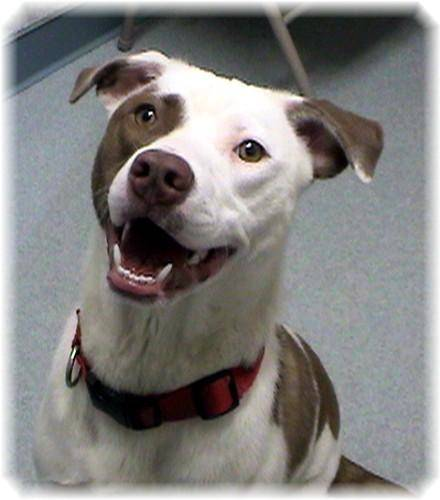

In [4]:
data_1

In [5]:
data_2 = img_to_array(data_1)

In [6]:
data_2

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [7]:
data_2.shape

(500, 440, 3)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = os.path.join('cats_and_dogs_filtered')

In [10]:
train_dir = os.path.join(path,'train')

In [11]:
validation_dir = os.path.join(path,'validation')

In [12]:
train_cats_dir = os.path.join(train_dir,'cats')

In [13]:
train_dogs_dir = os.path.join(train_dir,'dogs')

In [14]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [15]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

In [16]:
total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val
print("total_train",num_cats_tr+num_dogs_tr)
print("total_val",num_cats_val+num_dogs_val)

total_train 2000
total_val 1000


In [17]:
batch_size = 128
epochs = 15
IMG_HIEGHT = 150
IMG_WIDHT = 150

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=batch_size,directory=train_dir,
shuffle=True,target_size=(IMG_HIEGHT,IMG_WIDHT),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
val_data_gen = validation_image_generator.flow_from_directory(
batch_size=batch_size,directory=validation_dir,target_size=(IMG_HIEGHT,IMG_WIDHT),class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
sample_train_images, _ =next(train_data_gen)

In [22]:
sample_train_images

array([[[[0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         ...,
         [0.5176471 , 0.7254902 , 0.60784316],
         [0.50980395, 0.7176471 , 0.6       ],
         [0.5137255 , 0.72156864, 0.6039216 ]],

        [[0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         ...,
         [0.5176471 , 0.7254902 , 0.60784316],
         [0.50980395, 0.7176471 , 0.6       ],
         [0.5137255 , 0.72156864, 0.6039216 ]],

        [[0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         [0.31764707, 0.57254905, 0.44705886],
         ...,
         [0.5176471 , 0.7254902 , 0.60784316],
         [0.50980395, 0.7176471 , 0.6       ],
         [0.5137255 , 0.72156864, 0.6039216 ]],

        ...,

        [[0.454902  , 0.45882356, 0.43921572],
         [0.454902  , 0.45882356, 0.43921572]

In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

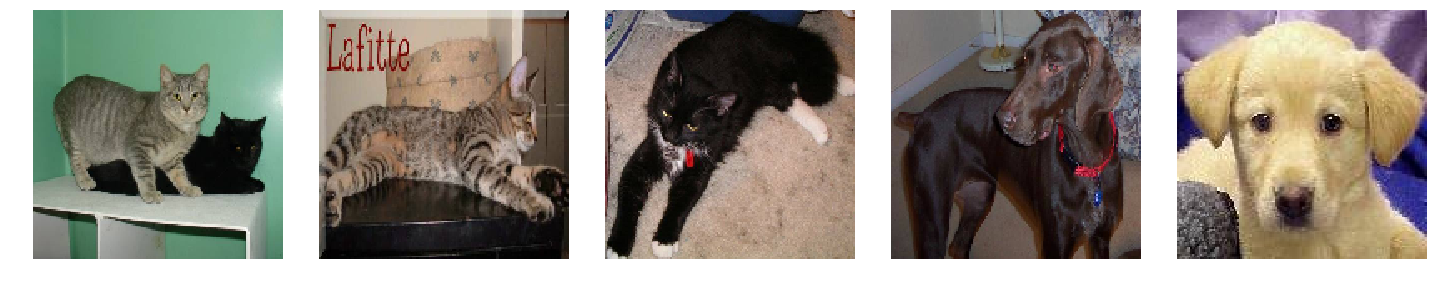

In [24]:
plotImages(sample_train_images[:5])

In [25]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [27]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [28]:
history = model.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,
                             validation_data=val_data_gen,validation_steps=total_val//batch_size)

C:\Users\Dany\.conda\envs\kajal\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 62s 4s/step - loss: 0.9833 - accuracy: 0.5346 - val_loss: 0.6922 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 58s 4s/step - loss: 0.6892 - accuracy: 0.5030 - val_loss: 0.6754 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 58s 4s/step - loss: 0.6649 - accuracy: 0.5458 - val_loss: 0.6383 - val_accuracy: 0.6150
Epoch 4/15
15/15 [==============================] - 58s 4s/step - loss: 0.6175 - accuracy: 0.6239 - val_loss: 0.6302 - val_accuracy: 0.6864
Epoch 5/15
15/15 [==============================] - 59s 4s/step - loss: 0.5657 - accuracy: 0.7005 - val_loss: 0.6099 - val_accuracy: 0.6964
Epoch 6/15
15/15 [==============================] - 62s 4s/step - loss: 0.5444 - accuracy: 0.7345 - val_loss: 0.5683 - val_accuracy: 0.6953
Epoch 7/15
15/15 [==============================] - 66s 4s/step - loss: 0.4985 - accuracy: 0.7415 - val_loss: 0.5676 - val_accuracy: 0.7065
Epoch 8/15
15/15 [==

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

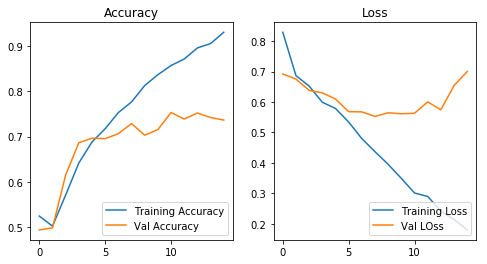

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='lower right')
plt.title('Loss')
plt.show()

In [31]:
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [32]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,shuffle=True,
                                              target_size=(IMG_HIEGHT,IMG_WIDHT))

Found 2000 images belonging to 2 classes.


In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [34]:
len(augmented_images)

5

In [35]:
train_data_gen[0][0][0]

array([[[0.02745098, 0.05882353, 0.        ],
        [0.04313726, 0.07450981, 0.01568628],
        [0.07058824, 0.08627451, 0.03137255],
        ...,
        [0.04705883, 0.03137255, 0.02745098],
        [0.0627451 , 0.04705883, 0.04313726],
        [0.08235294, 0.06666667, 0.0627451 ]],

       [[0.01568628, 0.04705883, 0.        ],
        [0.03137255, 0.05490196, 0.        ],
        [0.07058824, 0.08627451, 0.03137255],
        ...,
        [0.01176471, 0.        , 0.        ],
        [0.01960784, 0.00392157, 0.        ],
        [0.03137255, 0.01568628, 0.01176471]],

       [[0.01568628, 0.04313726, 0.        ],
        [0.03137255, 0.05882353, 0.        ],
        [0.09019608, 0.10588236, 0.04705883],
        ...,
        [0.07450981, 0.05882353, 0.04705883],
        [0.08235294, 0.07058824, 0.0509804 ],
        [0.08627451, 0.07058824, 0.05882353]],

       ...,

       [[0.1254902 , 0.10196079, 0.        ],
        [0.1254902 , 0.10980393, 0.00392157],
        [0.12156864, 0

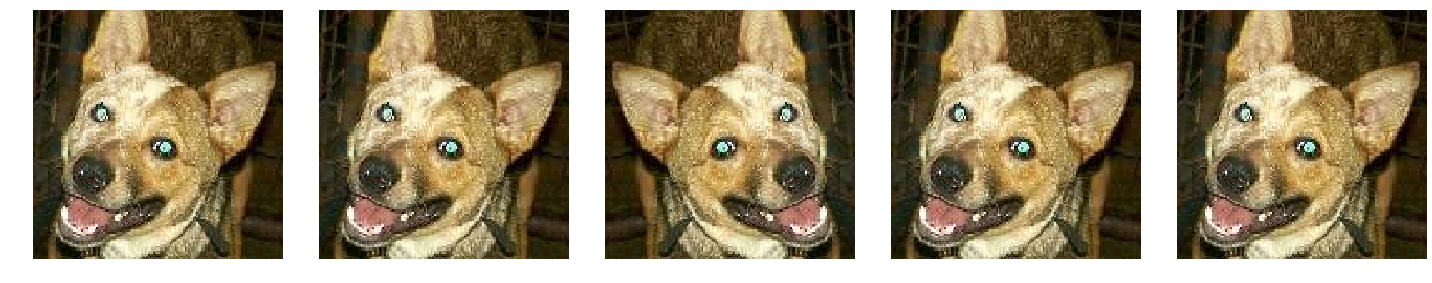

In [36]:
plotImages(augmented_images)

In [37]:
image_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=45)

Found 2000 images belonging to 2 classes.


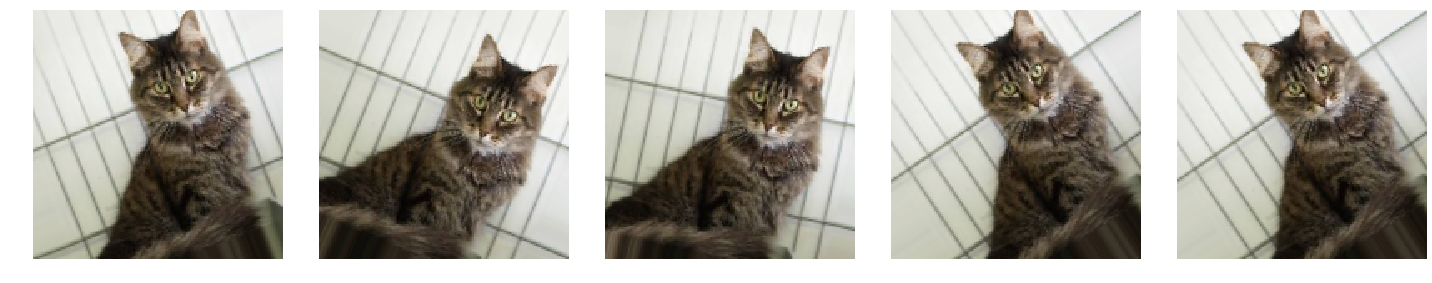

In [38]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,shuffle=True,
                                              target_size=(IMG_HIEGHT,IMG_WIDHT))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [39]:
image_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.5)

Found 2000 images belonging to 2 classes.


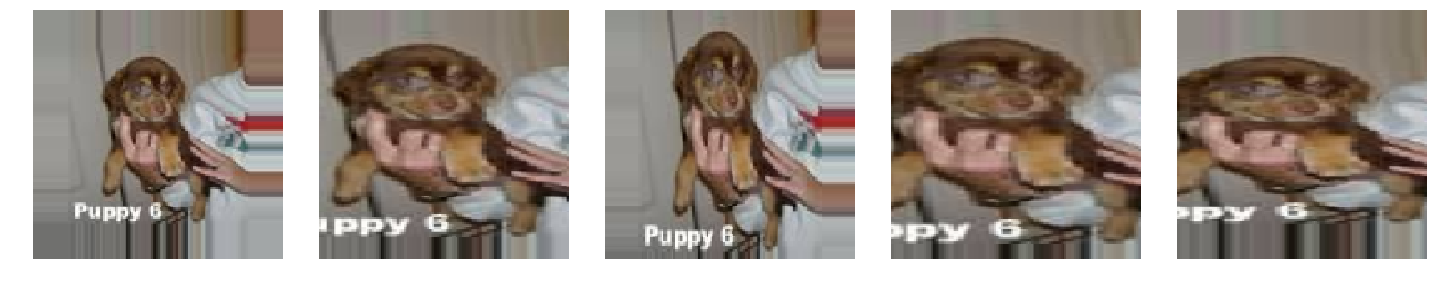

In [40]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,shuffle=True,
                                              target_size=(IMG_HIEGHT,IMG_WIDHT))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [41]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5)

In [42]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


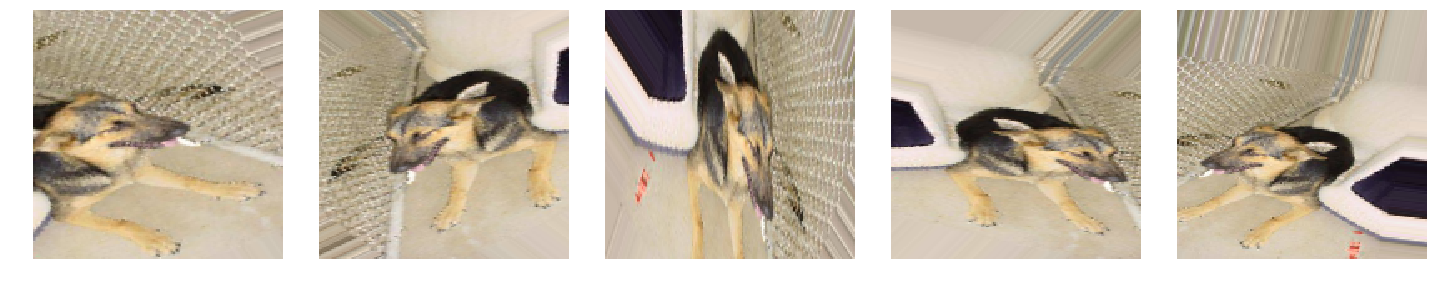

In [43]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [44]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [45]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [46]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [47]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = model_new.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,
                                 epochs=epochs,
                                 validation_data=val_data_gen,
                                 validation_steps=total_val//batch_size)

C:\Users\Dany\.conda\envs\kajal\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 77s 5s/step - loss: 0.6532 - accuracy: 0.6298 - val_loss: 0.6478 - val_accuracy: 0.6306
Epoch 2/15
12/15 [=======================>......] - ETA: 12s - loss: 0.6403 - accuracy: 0.6472

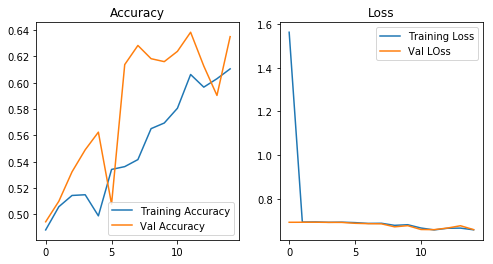

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


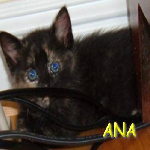

In [121]:
data_1 = load_img('cats_and_dogs_filtered/train/cats/cat.201.jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))

data_1

In [122]:
data_2 = img_to_array(data_1)
img_test = data_2.reshape(1,150,150,3)

In [123]:
img_test.shape

(1, 150, 150, 3)

In [124]:
pred = model_new.predict(img_test)

In [125]:
pred[0].round(2)

array([0.], dtype=float32)